# Naive Bayes i Classificació


En aquest tercer lliurament es programarà un classificador, que donada una *piulada*, la categoritzarà en una de les possibles classes. En aquesta ocasió, implementareu un classificador amb *piulades* relacionades amb el *cyber bullying*.

Recordeu que l'objectiu principal d'aquesta pràctica és desenvolupar un classificador amb una *accuracy* alta. 


**Què s’ha de fer?**

Volem classificar *piulades* segons a quin tipus de *cyber bullying* pertanyen. Així doncs, a partir de tots les *piulades* que tenim, crearem un vector de característiques que ens descrigui cadascuna. A continuació desenvoluparem un classificador probabilístic del tipus **Naive Bayes** que ens permeti identificar a quina classe de *cyber bullying* pertany una *piulada* donada, segons les característiques disenyades.


**Quina és la idea del sistema de classificació que s’ha de desenvolupar?**

El classificador és un concepte de l'aprenentatge automàtic supervisat. L'objectiu del classificador és donat un vector de característiques que descriuen els objectes que es volen classificar indicar a quina categoria o classe pertanyen d'entre un conjunt predeterminat. 

El procés de classificació consta de dues parts: 

+ el procés d'aprenentatge i 
+ el procés d'explotació o testeig. 

El procés d'aprenentatge rep exemples de parelles $(x,y)$ on $x$ són les característiques, usualment representades per nombres reals, i $y$ és la categoria a la que pertanyen. 
Aquest conjunt se'l coneix com a conjunt d'entrenament i ens servirà per trobar una funció $\hat{y}=f(x)$ que donada una $x$ aconsegueixi que $\hat{y}$ sigui semblant $y$. 

Per altra banda el procés de testeig aplica la funció $f(x)$ apresa a l'entrenament a a dades no presents en el conjunt d'aprenentatge per avaluar el classificador.

**Classificació i llenguatge natural**

La descripció dels exemples en característiques és el punt més crític de tot sistema d'aprenentatge automàtic. 
Una de les representacions més simples per tal de descriure un text és la representació ["bag-of-words"](https://en.wikipedia.org/wiki/Bag-of-words_model).

Aquesta representació converteix un text en un vector de $N$ paraules. 
Primer haurem de seleccionar el conjunt d'$N$ paraules que volem fer servir. Després, per cada paraula comptar quants cops apareix en el text. 

Una versió alternativa i més simple d'aquest procés pot ser simplement indicar al vector si una determinada paraula apareix o no en el text.

## Abans de començar


**\+ Durant la pràctica, solament es podran fer servir les següents llibreries**:

`Pandas, Numpy, Re` i `NLTK`

Python té un paquet integrat anomenat ["re"](https://www.w3schools.com/python/python_regex.asp), que es pot utilitzar per treballar amb expressions regulars. És molt aconsellable fer servir aquest paquet per processar les paraules.

**\+ No es poden modificar les definicions de les funcions donades, ni canviar els noms de les variables i paràmetres ja donats**

Això no implica però que els hàgiu de fer servir. És a dir, que la funció tingui un paràmetre anomenat `df` no implica que l'hàgiu de fer servir, si no ho trobeu convenient.

**\+ En les funcions, s'especifica que serà i de quin tipus cada un dels paràmetres, cal respectar-ho**

Per exemple (ho posarà en el pydoc de la funció), `df` sempre serà indicatiu del `Pandas.DataFrame` de les dades. Durant els testos, els paràmetres (i específicament `df`) no contindran les mateixes dades que en aquest notebook, si bé si seran del mateix tipus! Per tant, no us refieu de què tinguin, per exemple, el mateix nombre de files.

## Les dades

El 15 d'Abril de 2020, UNICEF va llançar una alarma com a resposta de l'augment de risc de *cyber bullying* durant la pandèmia COVID-19. 

Les estadístiques són prou alarmants: un 36.5% dels estudiants de l'escola fins a l'institut s'han sentit víctimes del *cyber bullying* i un 87% n'han estat testimonis, amb efectes que van des d'una disminució de resultats acadèmics fins a pensaments suïcides.

Amb l'objectiu d'ajudar a l'analisis de la situació, s'ha construit un dataset que conté més de 47000 *piulades* etiquetades d'acord amb la classe de *cyber bullying* que s'està donant:

1. `age`;
2. `ethnicity`;
3. `gender`;
4. `religion`;
5. `other type of cyberbullying`;
6. `not cyberbullying`

Les dades han estat balancejades per tal de contenir aproximadament 8000 mostres de cada classe.

# Preparar les dades

## Lectura de les dades

In [174]:
import pandas as pd
import numpy as np
import re

In [175]:
df = pd.read_csv('./cyberbullying_tweets.csv')
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [176]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

## Preparació del dataset

Dividim les *piulades* en un conjunt d'entrenament, *train*, i en un conjunt de validació, *test*, per tal de poder entrenar i validar el nostre model de classificació.

In [177]:
from sklearn.model_selection import train_test_split

df_tweets_train, df_tweets_test = train_test_split(df, test_size=0.2)

Com les dades estaven balancejades originalment, podem observar que la distribució de cadascuna de les classes es manté:

In [178]:
df_tweets_train['cyberbullying_type'].value_counts()

cyberbullying_type
not_cyberbullying      6405
age                    6391
gender                 6361
ethnicity              6356
religion               6348
other_cyberbullying    6292
Name: count, dtype: int64

In [179]:
df_tweets_test['cyberbullying_type'].value_counts()

cyberbullying_type
religion               1650
gender                 1612
ethnicity              1605
age                    1601
not_cyberbullying      1540
other_cyberbullying    1531
Name: count, dtype: int64

# Implementació

Dividirem el notebook en 3 seccions que es complementen una a l'altra:

1. Anàlisi exploratòria de les dades: Informació bàsica sobre les *piulades*.
2. Processament de les dades: Creació d'un vector de característiques a partir de les *piulades*.
3. Desenvolupament d'un classificador *Naive Bayes*. 

### 1. Anàlisis de dades

El primer que haurem de fer és analitzar les dades per veure una mica com són. El que us proposem és fer una sèrie de visualitzacions per observar les dades, com ara:

* el nombre de *piulades* que s'estan dirigint a una persona en concret
* el nombre de  *hashtags* que hi ha a cada categoria de *piulades*
* el nombre de  *piulades* que hi ha de cada categoria de *piulades*
* el nombre de  *piulades* de la categoria `not_cyberbullying` que es dirigeixen a un usuari vs totes les altres categories
* altres coses que penseu que poden ser rellevants.

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
df_tweets_train.head()

,tweet_text,cyberbullying_type
17718,@Clashoftherats But thanks for demonstrating f...,religion
33378,"I'm the girl who bullied you in high school, w...",age
19689,I assumed this would already have been in plac...,religion
31760,This kid who called me a pig In high school re...,age
38923,You were bullied and humiliated by the pretty ...,age


#### EXERCICI 1: 

* Quantes *piulades* estan dirigides a un usuari concret? Diem que una piulada va dirigida a una persona en concret si contenen el patró ``@usuari``. 

[Restriccions](https://help.twitter.com/en/managing-your-account/change-twitter-handle) que imposa X sobre el patró:
+ Nomes són valids aquells patrons amb caràcters alfanumèrics ``[A-z 0-9]`` i el caràcter ``_``
+ Els patrons han de començar per ``@`` i han de tenir més de 4 i menys de 16 caràcters.

En aquest exercici és extremadament útil l'ús del mòdul ``re``.

In [182]:
# Definim el patró per detectar usuaris
patro_usuari = re.compile(r'@[A-Za-z0-9_]{4,15}\b')

def comptar_piulades_amb_usuari(df):
    # Filtra les piulades que compleixen el patró
    piulades_amb_usuari = df['tweet_text'].apply(lambda text: bool(patro_usuari.search(text)))
    
    # Retorna el total de coincidències
    return piulades_amb_usuari.sum()


nombre_piulades_amb_usuari = comptar_piulades_amb_usuari(df_tweets_train)
# Mostrem el resultat per al conjunt d'entrenament i testeig
print(f"Nombre de piulades dirigides a un usuari concret: {nombre_piulades_amb_usuari}")
print(f"En el Conjunt de testeigs hi tenim {comptar_piulades_amb_usuari(df_tweets_test)} piulades dirigides a un usuari concret")


Nombre de piulades dirigides a un usuari concret: 14375
En el Conjunt de testeigs hi tenim 3601 piulades dirigides a un usuari concret


+ Quants *hashtags* ``#`` hi ha a cada categoria de *piulades*?

Compteu els ``#`` que vagin seguits d'alguna lletra o nombre ja que, com veiem a la [normativa](https://help.twitter.com/en/using-twitter/how-to-use-hashtags) de X, els ``#`` no poden contenir cap mena de signe de puntuació.

In [183]:
# Definim un patró d'expressió regular per identificar hashtags
patro_hashtag = re.compile(r'#\w+')

def comptar_hashtags_per_categoria(df):

    # Crear una nova columna amb el nombre de hashtags per cada piulada
    df['num_hashtags'] = df['tweet_text'].apply(lambda text: len(patro_hashtag.findall(text)))
    
    # Agrupar per categoria i sumar els hashtags
    resultat = df.groupby('cyberbullying_type')['num_hashtags'].sum().reset_index()
    resultat.columns = ['cyberbullying_type', 'total_hashtags']
    
    return resultat

hashtags_per_categoria = comptar_hashtags_per_categoria(df_tweets_train)
# Imprimim el resultant que mostra el nombre total de hashtags per cada categoria
print(hashtags_per_categoria)



    cyberbullying_type  total_hashtags
0                  age             611
1            ethnicity             912
2               gender            2186
3    not_cyberbullying            2660
4  other_cyberbullying            1316
5             religion            1408


+ Fes un histograma que representi aquesta distribució?

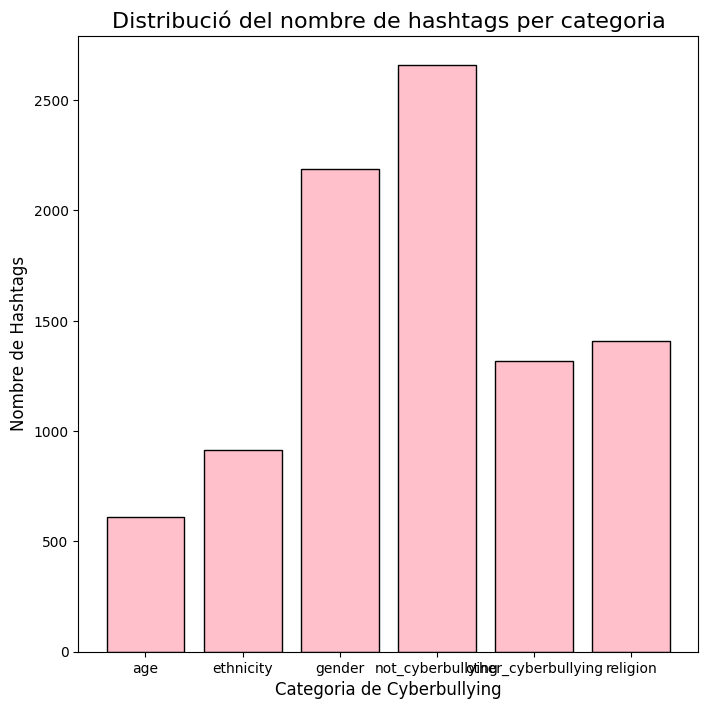

In [184]:
plt.figure(figsize=(8, 8))

# Crear el gràfic de barres
plt.bar(hashtags_per_categoria['cyberbullying_type'], hashtags_per_categoria['total_hashtags'], color='pink', edgecolor='black')

# Afegir títol i etiquetes
plt.title('Distribució del nombre de hashtags per categoria', fontsize=16)
plt.xlabel('Categoria de Cyberbullying', fontsize=12)
plt.ylabel('Nombre de Hashtags', fontsize=12)

# Mostrar el gràfic
plt.show()


+ Comproveu a continuació quantes vegades hi ha un ús invàlid dels ``#``, per exemple ``##`` o ``#@``, on, si no tinguessim en compte la restriccio imposada, hauriem contat 2 ``#`` a ``##`` o 1 ``#`` a ``#@``, quan en realitat son 1 i 0 respectivament.

In [185]:
def comptar_usos_incorrectes(df, col_text):
    
    # Patró per identificar usos incorrectes
    pattern_invalid = re.compile(r'##|#[@\W]')
    
    # Comptar usos incorrectes
    usos_incorrectes = df[col_text].str.count(pattern_invalid).sum()
    return usos_incorrectes

usos_incorrectes = comptar_usos_incorrectes(df_tweets_train, 'tweet_text')
# Imprimim el resultat que mostra el nombre total d'usos incorrectes dels hashtags
print(f"Nombre total d'usos incorrectes dels hashtags: {usos_incorrectes}")


Nombre total d'usos incorrectes dels hashtags: 54


+ Quantes *piulades* vàlides hi ha de cada categoria?

In [186]:
def comptar_categories_valides(df):
    # Patrons per detectar hashtags vàlids i invàlids
    patro_invalid = re.compile(r'#\W*#|#@')  # Hashtags mal formats
    patro_valid = re.compile(r'(?<!#)(#(?!\W*#|@)[A-Za-z0-9]+)\b')  # Hashtags correctes

    # Marquem si cada piulada és vàlida
    df['es_valida'] = df['tweet_text'].apply(
        lambda piulada: len(re.findall(patro_invalid, str(piulada))) == 0 if isinstance(piulada, str) else False
    )

    # Agrupem per categoria i comptem piulades vàlides
    piulades_valides_per_categoria = df.groupby('cyberbullying_type')['es_valida'].sum().reset_index()

    # Renomenem la columna resultant
    piulades_valides_per_categoria.rename(columns={'es_valida': 'piulades_valides'}, inplace=True)
    return piulades_valides_per_categoria

resultat = comptar_categories_valides(df_tweets_train)
print(resultat)


    cyberbullying_type  piulades_valides
0                  age              6389
1            ethnicity              6353
2               gender              6360
3    not_cyberbullying              6404
4  other_cyberbullying              6292
5             religion              6348


+ Quantes *piulades* de la categoria `not_cyberbullying` és dirigeixen a un usuari?
+ Quantes *piulades* de totes les altres categories és dirigeixen a un usuari?

In [187]:
def comptar_piulades_dirigides_per_categoria(df):
    # Patró per detectar mencions d'usuaris
    patro_usuari = re.compile(r'@\w+')

    # Comptem les piulades dirigides a usuaris a la categoria 'not_cyberbullying'
    piulades_no_ciberassetjament = df[df['cyberbullying_type'] == 'not_cyberbullying']
    compte_usuaris_no_ciberassetjament = piulades_no_ciberassetjament['tweet_text'].apply(
        lambda text: bool(re.findall(patro_usuari, str(text))) if isinstance(text, str) else False
    ).sum()

    # Comptem les piulades dirigides a usuaris a les altres categories
    altres_categories = df[df['cyberbullying_type'] != 'not_cyberbullying']
    compte_usuaris_altres_categories = altres_categories['tweet_text'].apply(
        lambda text: bool(re.findall(patro_usuari, str(text))) if isinstance(text, str) else False
    ).sum()

    return compte_usuaris_no_ciberassetjament, compte_usuaris_altres_categories

compte_no_ciberassetjament, compte_altres_categories = comptar_piulades_dirigides_per_categoria(df_tweets_train)

# Mostrar el resultat
print(f'Piulades de la categoria "not_cyberbullying" dirigides a un usuari: {compte_no_ciberassetjament}')
print(f'Piulades de totes les altres categories dirigides a un usuari: {compte_altres_categories}')

Piulades de la categoria "not_cyberbullying" dirigides a un usuari: 3355
Piulades de totes les altres categories dirigides a un usuari: 11116


+ Calculeu altres coses que penseu que poden ser rellevants (usuaris més mencionats, *hashtags* més comuns per cada categoria, etc.).

In [188]:
def analitzar_piulades(df):
    # Patró per detectar usuaris mencionats
    patro_usuari = r'@[A-Za-z0-9_]{4,15}'

    # Extreure mencions d'usuaris i comptar la seva freqüència
    mencions = df['tweet_text'].dropna().apply(
        lambda text: re.findall(patro_usuari, str(text))
    ).explode()
    usuaris_mes_mencionats = mencions.value_counts().head(10)

    # Calcula la longitud de cada piulada
    df['longitud'] = df['tweet_text'].apply(lambda text: len(str(text)))

    # Longitud mitjana de les piulades per categoria
    longitud_mitjana_per_categoria = df.groupby('cyberbullying_type')['longitud'].mean()

    # Mostrar resultats
    print("Usuaris més mencionats:")
    print(usuaris_mes_mencionats)
    print("\nLongitud mitjana de les piulades per categoria:")
    print(longitud_mitjana_per_categoria)

analitzar_piulades(df_tweets_train)


Usuaris més mencionats:
tweet_text
@tayyoung_          751
@freebsdgirl        185
@MaxBlumenthal      128
@mykitchenrules      94
@ChrisWarcraft       89
@IsraeliRegime       86
@realDonaldTrump     79
@Spacekatgal         77
@MT8_9               75
@TheQuinnspiracy     72
Name: count, dtype: int64

Longitud mitjana de les piulades per categoria:
cyberbullying_type
age                    173.386012
ethnicity              139.758653
gender                 136.064298
not_cyberbullying       82.908665
other_cyberbullying     86.273522
religion               197.830340
Name: longitud, dtype: float64


### 2. Comptar paraules

In [189]:
# No modificar aquesta cel·la, s'encarrega de fer el procés més eficient.
# Intenteu entendre quà fa aquesta cel·la

def memo(f):
    class memodict(dict):
        def __init__(self, f):
            self.f = f
        def __call__(self, *args):
            return self[args]
        def __missing__(self, key):
            ret = self[key] = self.f(*key)
            return ret
    return memodict(f)

El primer que haurem d'implementar és la funció ``standardize`` que estandaritzarà les paraules.

#### EXERCICI 2: 

+ Empleneu la funció següent que, donada una paraula, la estandaritzi les paraules passant tots els caràcters a minúscules.

**Observació:** Podeu considerar diverses possibilitats per aquesta funció:
* Només canviar les lletres majúscules per minúscules
* Eliminar tots els símbols que no siguin @, # i _ (i substituïr-los per un espai)
* Eliminar tots els símbols (i substituïr-los per un espai)
* etc.

El mòdul `re` de Python és especialment útil en aquest punt. 

Trieu aquella possibilitat que dóna millor resultats a l'exercici 7!

In [190]:
@memo
def standardize(word):
    """
    :param word: paraula a estandaritzar
    :return : paraula estandaritzada
    """
    # Comprovació de si 'word' és una cadena
    if not isinstance(word, str):
        return word

    # Convertir a minúscules
    word = word.lower()

    # Eliminar tots els símbols que no siguin @, # i _
    symbolsPattern = re.compile(r'[^a-z0-9@#_]')
    word = re.sub(symbolsPattern, ' ', word).strip()

    # Substituir múltiples espais per un de sol
    word = re.sub(r'\s+', ' ', word)
    if len(word) < 2: return ""

    return word


In [191]:
standardize("Taller DELS noUS USOS")

'taller dels nous usos'

#### EXERCICI 3: 

+ Feu una funció ``count_words`` que construeixi un diccionari que contingui totes les paraules que s'han trobat al dataset, tot indicant el total de cops que ha aparegut cadascuna i el nombre de piulades on apareix. 

El resultat ha de ser un diccionari d'aquest tipus (no necessàriament amb aquest valors):

```python
{
    'memory' : {'n_ocur': 88, 'n_piu': 76},
    'best': {'n_ocur': 123, 'n_piu': 65},
    ...
}
```

In [192]:
def count_words(df):
    """
    :param df: DataFrame amb les piulades i la informació associada
    :return : Diccionari amb el format {word : {n_ocur: valor, n_tweets: valor}, ...}
    """

    dicc = {}
    # Iterem per cada piulada del DataFrame
    for text in df['tweet_text']:
        text_standarized = standardize(text)
        words = text_standarized.split()

        seen = set()
        # Iterem per cada paraula al text
        for word in words:
            # Si la paraula no és al diccionari, inicialitzem la seva entrada
            if word not in dicc:
                dicc[word] = {'n_ocur': 0, 'n_piu': 0}
                
            # Incrementem el comptador del nombre d'ocurrències
            dicc[word]['n_ocur'] += 1
            
            # Si la paraula encara no s'ha comptat per aquesta piulada, actualitzem el comptador de piulades
            if word not in seen:
                dicc[word]['n_piu'] += 1
                seen.add(word) # Marquem la paraula com a vista per aquesta piulada
    return dicc

In [193]:
dicc_text = count_words(df_tweets_train)
print (len(dicc_text))
print("'rape':",dicc_text['rape'])

53858
'rape': {'n_ocur': 3558, 'n_piu': 3267}


### 3. Comptar paraules per cada categoria de piulada

In [194]:
df_tweets_train.head()

,tweet_text,cyberbullying_type,num_hashtags,es_valida,longitud
17718,@Clashoftherats But thanks for demonstrating f...,religion,0,True,105
33378,"I'm the girl who bullied you in high school, w...",age,0,True,113
19689,I assumed this would already have been in plac...,religion,0,True,267
31760,This kid who called me a pig In high school re...,age,1,True,274
38923,You were bullied and humiliated by the pretty ...,age,0,True,164


#### EXERCICI 4: 

+ Fent servir la funció que se us dona a continuació (`eachTopic`), apliqueu-la per tal de comptar les paraules que s'han trobat i la seva ocurrència segregant ara per categoria.

El resultat ha de ser un diccionari d'aquest tipus (no necessàriament amb aquest valors):

```python
{
    'ethnicity': {
        'race' : {'n_ocur': 88, 'n_piu': 76},
        'what': {'n_ocur': 123, 'n_piu': 65}
        ...
    },
    ...
    'gender': {
        'jokes' : {'n_ocur': 18, 'n_piu': 17},
        'you': {'n_ocur': 154, 'n_piu': 66}
    }
    ...
}
```

In [195]:
def count_words_categories(df):
    """
    Funció que ha de constuir un diccionari que conté la freqüència de les
    paraules i el número de piulades on ha aparegut.
    Aquesta informació ha de ser dividida per diferents categories de cyberbullying.

    :param df: DataFrame amb les piulades i la informació associada
    :return : Diccionari amb el format {label : {word : {n_ocur: valor, n_news: valor} } }
    """
    words_topic = {}

    def eachTopic(group):
        # Count words on this topic and save to dictionary
        words_topic[group.name] = count_words(group)

    df.groupby('cyberbullying_type').apply(eachTopic)

    return words_topic


In [196]:
words_categories = count_words_categories(df_tweets_train)
print ("Categories:", len(words_categories))
print ("La paraula 'muslims' a la categoria 'religion':", words_categories["religion"]['muslims'])

Categories: 6
La paraula 'muslims' a la categoria 'religion': {'n_ocur': 1931, 'n_piu': 1677}


C:\Users\victo\AppData\Local\Temp\ipykernel_29488\3043014231.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('cyberbullying_type').apply(eachTopic)


### 4. Paraules més freqüents a les piulades


**El problema de com escollir el vector de carecterístiques**

L'elecció de les paraules que formen el vector de característiques és un pas crític. En funció de com de bona sigui aquesta descripció, millor funcionarà el sistema. Tot i que us deixem a vosaltres la política de creació del vector de característiques us donem una pista: una possible estratègia és agafar aquelles paraules que apareixen entre en un 10 i un 50 percent del total de piludades (sense tenir en compte la categoria). És a dir, paraules que no són ni massa freqüents ni massa poc. Podeu experimentar variant aquests valors.

Una altra estratègia interessant és eliminar "stop words".

#### EXERCICI 5: 

+ Feu una funció ``topNwords`` que crei un diccionari amb les N paraules més representatives (les que apareixen amb més freqüència) de cadascuna de les categories de *cyberbullying* (Tenint en compte que haureu tret aquelles paraules que apareixen en la majoria de piulades, així com també, les que únicament apareixen en un conjunt molt petit de piulades). Una pista de que aneu ben encaminats es que per cadascuna de les categories de *cyberbullying* obtingueu paraules rellevants per aquesta. Si no es així, vol dir que heu d'incrementar el nombre de paraules a saltar (*skip_top*).

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    'age': ['school', 'high', ...],
    ...
    'religion': ['muslims', 'christian',...]
    ...
}
```

+ Experimenteu omplint la llista `skip_top` amb aquelles paraules que penseu no tenen significat o relevancia per definir cada categoria. Podeu buscar informació sobre **stop words** a internet i definir varies llistes fins que penseu que obteniu una bona representació de paraules per categoria de `cyberbullying`.

In [197]:
def define_skiptop():
    stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her",
    "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs",
    "themselves", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
    "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if",
    "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why", "how",
    "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "can", "will",
    "just", "don", "should", "now", "rt", "co", "u", "one", "http", "https", "www",
    "com", "t", "s", "like"
    ]


    return stop_words

def topNwords(df, words, N, skip=[]):
    """
    :param df: DataFrame amb les piulades i la informació associada
    :param words: diccionari amb les paraules i la seva frequencia
    :param N: número de paraules més representatives que volem considerar
    :return : Diccionari amb el format {categoria1: llista_top_words_cat_1,  
                                        categoria2: llista_top_words_cat_2, ...} 
    """
    top_words = dict()

    # Iterem per cada categoria present al DataFrame
    for category in df['cyberbullying_type'].unique():
        df_filtered = df[df['cyberbullying_type'] == category]

        # Establim un llindar superior: una paraula que aparegui en el 90% de les piulades
        high_threshold = df_filtered.shape[0] * 0.9

        category_words = {}
        # Seleccionem només les paraules que no estan a skip i que no són massa freqüents
        for word, info in words[category].items():
            if word not in skip and info['n_ocur'] <= high_threshold:
                category_words[word] = info['n_ocur']

        # Ordenem les paraules per freqüència decreixent
        sorted_words = sorted(category_words.items(), key=lambda x: x[1], reverse=True)

        # Agafem només les N primeres
        top_words[category] = [word for word, freq in sorted_words[:N]]

    return top_words


### 5. Vector de Característiques

#### EXERCICI 6: 

Creeu el vector de característiques necessari per a fer l’entrenament del Naïve Bayes amb la funció ``create_features``.

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    0: np.array([0, 1, 1, 0, ...]),
    1: np.array([0, 1, 1, 1, ...]),
    ...
}
```

In [198]:
def create_features(df, top_words):
    """
    :params df: DataFrame amb les piulades i la informació associada
    :params top_words: ha de ser el diccionari que retorna topNWords
    :return : diccionari o pd.Series que conté un np.array per a 
        cadascuna de les piulades amb el vector de característiques corresponent.
    """
    # Extreiem totes les paraules top de totes les categories i les col·loquem en un conjunt
    all_worlds = [word for category, words in top_words.items() for word in words]
    all_worlds = set(all_worlds)

    # Nombre total de paraules top
    n_words = len(all_worlds)

    # Obtenim la llista d'índexos de df per garantir que els vectors quedin associats a l'índex original
    valid_idx = df.index.tolist()

    # Diccionari on guardarem el vector de característiques per a cada piulada
    dict_feat_vector = {}

    for idx, piulada in enumerate(df['tweet_text']):
        # Inicialitzem un vector de mida n_words a zero
        vect_piulada = np.zeros(n_words, dtype=int)

        # Estandarditzem les paraules de la piulada per comparar-les amb all_worlds
        piulada_standardized = [standardize(word) for word in piulada.split()]

        # Per a cada paraula top, posem un 1 si apareix a la piulada estandarditzada
        for pos, top_word in enumerate(all_worlds):
            if top_word in piulada_standardized:
                vect_piulada[pos] = 1

        # Assignem el vector de característiques a l'índex corresponent
        dict_feat_vector[valid_idx[idx]] = vect_piulada

    return dict_feat_vector

In [199]:
N = 20 # Aquest parametre el podem canviar i fer proves per avaluar quin és el millor valor.
words_categories = count_words_categories(df_tweets_train)

top_words = topNwords(df_tweets_train, words_categories, N)
dict_feat_vector = create_features(df_tweets_train, top_words)


C:\Users\victo\AppData\Local\Temp\ipykernel_29488\3043014231.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('cyberbullying_type').apply(eachTopic)


In [200]:
len(dict_feat_vector)

38153

### 6. El classificador Naïve Bayes

Un cop tenim una representació necessitem un procés d'aprenentatge que ens permeti passar de la descripció a una categoria. 
En aquest lliurament farem servir el classificador Naïve Bayes. 
Aquest classificador forma part de la família de classificadors probabilístics. 
La sortida d'un classificador probabilístic és un valor de probabilitat donat un exemple per cadascuna de les categories. 
La decisió final correspon a la categoria amb més probabilitat. 


Els classificadors probabilistics Bayesians es basen en el teorema de Bayes per realitzar els càlculs per estimar la probabilitat condicionada $p(y|x)$, on $y$ és la categoria i $\mathbf x$ les característiques de l'exemple.

La fòrmula de Bayes és fàcil de deduir. Sabem que:

$$ p(\mathbf x,y) = p(\mathbf x|y)p(y) = p(y|\mathbf x)p(\mathbf x)$$
d'on podem extreure que: 
$$ p(y|\mathbf x) = \frac{p(\mathbf x|y)p(y)}{p(\mathbf x)}$$


La millor categoria serà la que fa màxima la probabilitat $ p(y|\mathbf x)$ i per comparar aquests valors i saber quin és el màxim no cal calcular $p(\mathbf x)$ (que és constant). Per tant, considerarem que:
$$ p(y|\mathbf x) \approx p(y) · p(\mathbf x|y)$$


Les deduccions fins a aquest punt són vàlides per la majoria de classificadors Bayesians. 
Naïve Bayes es distingeix de la resta perquè imposa una condició encara més restrictiva. 
Considerem $\mathbf x=(x_1, \cdots, x_n)$ un conjunt d'$N$ variables aleatòries (en el nostre cas, les paraules seleccionades). 
Naïve Bayes assumeix que la probabilitat de la presència d'una paraula en una piulada és independent de la presència d'una altra i per tant podem escriure:
$$p(x_1,x_2,...,x_N | y) = p(x_1|y)p(x_2|y)...p(x_N|y)$$


Podem interpretar l'anterior equació de la següent forma: La probabilitat de que una piuldad descrita pel vector de característiques (0,1,0,1,1,1) sigui de la classe "gender" és proporcional al producte de la probabilitat que la primera paraula del vector no aparegui en les piulades sobre "gender" per la probabilitat que la segona paraula sí que hi aparegui, etc.


**Estimant les probabilitats marginals condicionades**

L'últim pas que ens queda és trobar el valor de les probabilitats condicionades. 
Farem servir la representació de $0$'s i $1$'s indicant que la paraula no apareix (0) o sí apareix (1) a la piulada. 

Per trobar el valor de la probabilitat condicionada farem servir una aproximació freqüentista a la probabilitat. 
Això vol dir que calcularem la freqüència d'aparició de cada paraula per a cada categoria. 
Aquest càlcul es fa dividint el nombre de piulades de la categoria en que apareix la paraula pel nombre total de piulades d'aquella categoria. 

En general:
$$p(x = \text{"school"} | y = C)= \frac{A}{B} $$
on $A$ és el número de piulades de la categoria $C$ on hi apareix la paraula 'school' i $B$ és el número total de piulades de la categoria $C$.


#### Punts delicats a tenir en compte.

**El problema de la probabilitat 0**

Si us hi fixeu bé, la probabilitat pot ser 0!!  Això vol dir, que si en una piulada no hi apareix una paraula, no pot ser classificada com cap tipus de *cyber bullying* (la presència del 0 al producte fa que el resultat sigui 0).

No sembla raonable que s'assigni o no en aquesta categoria segons si en la piulada hi apareix o no una única paraula. 
Per tant, el que s'acostuma a fer és donar una baixa probabilitat en comptes de zero. 

Una de les possibles solucions es fer servir la correcció de Laplace. Seguint l'exemple anterior la correcció de Laplace és:

$$p(x= \text{"school"} | y = 'C' ) = \frac{A+1}{B+M}$$ 

on $M$ és el nombre de categories.

**El problema de l'"underflow"**

La valor que hem de calcular en el Naive Bayes és el resultat d'un producte. 
El nombre de caractéristiques del vector és el nombre de termes del producte. 
Aquests nombres són iguals o menors a 1 i n'hi ha molts, si els multipliquem entre ells el resultat serà massa petit per a representar-lo en un nombre de punt flotant i el càlcul acabarà sent reduït a zero. 

Per solucionar aquest problema en comptes d'operar fent multiplicacions, se sol passar a l'escala logarítmica i allà operar fent servir sumes en comptes de multiplicacions.

#### EXERCICI 7: 

+ Implementeu la funció d'aprenentatge del classificador Naïve Bayes (funció ``naive_bayes_learn()``) que retorni un diccionari amb estructura `{categoria: [P0, ..., PN]}` on la llista representa la probabilitat
marginal condicionada de cada paraula del vector de característiques per la categoria corresponent. 

+ Implementeu la funció ``naive_bayes`` que implementa el classificador. Noteu que aquesta funció está guiada i només haureu d'emplenar els espais on hem posat tres punts suspensius "#···".  

In [201]:
def naive_bayes_learn(df, feats):
    """
    :params df: DataFrame amb les piulades i la informació associada
    :params feats: vector de característiques de cada piulada
    :return : probabilitats marginals condicionades
    """
    probs = {}
    
    # Obtenim les categories de 'cyberbullying_type'
    cyberbullying_type  = df['cyberbullying_type'].unique()
    M = len(cyberbullying_type)

    # Iterem sobre els índexs i els valors dels vectors de característiques
    for index, values in feats.items():
        
        # Obtenim la piulada i la seva categoria
        tweet = df.loc[index]
        category = tweet["cyberbullying_type"]
        
        # Afegim els valors al diccionari de probabilitats
        if category not in probs.keys():
            probs[category] = values
        else:
            probs[category] += values
            
    # Calculem les probabilitats condicionades per cada categoria
    for category in cyberbullying_type:
        
        A = probs[category] # Sumatori de les característiques per la categoria
        B = len(df[df["cyberbullying_type"] == category]) # Nombre de piulades en la categoria
        
        # Probabilitat condicional amb suavització additiva
        probs[category] = (A+1)/(B+M)
    

    return probs


In [202]:

def naive_bayes(df_train, feat_train, feat_test=None, df_test=None):
    """
    Funció que implementa el clasificador Naive_Bayes.

    Si df_test no és None, ha de calcular l'encert sobre les dades de test. És a dir,
    després de classificar feat_test ha de comparar la classificació amb la classe
    real i dir (print) quin percentatge d'encert ha obtingut.

    :param df_train: DataFrame amb les piulades que s'utilitzaran per l'entrenament
    :param feat_train: Diccionari amb els vectors de característiques de cada tweet de l'entrenament
    :param feat_test: Diccionari amb els vectors de característiques de cada tweet de test
    :param df_test: DataFrame amb les piulades que s'utilitzaran pel test

    :return : Una sèrie on l'índex correspon amb els indexos de df_test i els valors són la
              classificació retornada per Naive Bayes
    """
    # Aprenem les probabilitats de cada paraula per categoria
    probs = naive_bayes_learn(df_train, feat_train)

    # Probabilitat d'aparició de cada categoria (P(categoria))
    p_total = len(df_train)
    p_of_cat = df_train['cyberbullying_type'].value_counts() / p_total

    def eachFeats(row):
        id, feat = row
        p_max = -float('inf')
        feat = np.array(feat)
        p_cat = None

        # Recorrem cadascuna de les categories per veure quina té la probabilitat més alta
        for category in probs:
            # Calcula log P(category) + suma de (log(prob(word)) si apareix la paraula,
            # o log(1 - prob(word)) si no apareix.

            # Utilitzem el log de les probabilitats per evitar problemes d'underflow
            prob_category = np.log(p_of_cat[category])

            # Suma de log(prob(word)) * feat[i] + log(1 - prob(word)) * (1 - feat[i])
            # feat[i] és 1 si la paraula i està present, 0 si no.
            prob_category += np.sum(
                np.log(probs[category]) * feat + np.log(1 - probs[category]) * (1 - feat)
            )

            # Actualitzem si trobem una probabilitat més alta per a alguna categoria
            if prob_category > p_max:
                p_max = prob_category
                p_cat = category

        return id, p_cat

    data = map(eachFeats, feat_test.items())
    data = pd.Series(dict(data)).reindex(df_test.index)
    correct = data == df_test['cyberbullying_type']
    print("Accuracy: {}".format(correct.sum() / correct.size))

    return correct.sum() / correct.size


In [203]:
N = 20 # Aquest parametre el podeu canviar i fer proves per avaluar quin és el millor valor.


words_topics = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_topics, N, skip = define_skiptop())
feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)

C:\Users\victo\AppData\Local\Temp\ipykernel_29488\3043014231.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('cyberbullying_type').apply(eachTopic)


In [204]:
accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)


Accuracy: 0.7836251179368907


Haurieu d'obtenir una precisió del 67-70%. 

#### EXERCICI 8: 

El possible procediment per tal d'aconseguir una major precisió seria el següent:
+ Es poden implementar diverses maneres d'escollir quines *stopwords* volem eliminar en les piuldades per a que no formin part dels vectors de característiques.
+ Avaluar quin conjunt d'*stopwords* retorna una precisió major per a N=40. 
+ Un cop tinguem el vector d'*stopwords* amb millors resultats, el testejarem per a diferents $N$'s per a veure quina és el nombre de *stopwords* òptim.

Feu una cerca a Intenet per trobar més estratègies i intenteu millorar l'*accuracy* que heu acosneguit fins ara.

Amb això podeu arribar a precisions superiors al 80%.

In [205]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
# Obtener la lista de stop words en inglés
stop_words_english = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [206]:
def compute_idf_from_counts(word_counts, total_tweets):
    """
    Calcula l'IDF a partir del diccionari generat per `count_words`.
    :param word_counts: Diccionari amb format {word: {'n_ocur': valor, 'n_piu': valor}, ...}
    :param total_tweets: Nombre total de tweets (documents)
    :return: Diccionari amb format {word: IDF_value, ...}
    """
    # Convertim el diccionari de word_counts a un DataFrame per utilitzar operacions vectoritzades
    df = pd.DataFrame.from_dict(word_counts, orient='index')

    # Calculem l'IDF de manera vectoritzada: log(N / (1 + n_piu))
    df['idf'] = np.log(total_tweets / (1 + df['n_piu']))

    # Convertim el resultat de nou a un diccionari
    return df['idf'].to_dict()

def extract_stop_words_from_idf(idf_values, idf_threshold=1.0):
    """
    Genera una llista de paraules stop words basada en el llindar de l'IDF.
    :param idf_values: Diccionari amb format {word: IDF_value, ...}
    :param idf_threshold: Llindar per determinar si una paraula és comuna (baix IDF)
    :return: Conjunt de paraules considerades com a stop words
    """
    # Filtrar paraules amb IDF menor al llindar i amb longitud superior a 2
    stop_words = {word for word, idf in idf_values.items() if idf < idf_threshold and len(word) > 2}
    return stop_words


# Total de tweets per calcular les estadístiques
total_tweets = len(df_tweets_train)

# Pas 1: Comptar paraules i les seves estadístiques
word_counts = count_words(df_tweets_train)

# Pas 2: Calcular l'IDF a partir dels comptatges
idf_values = compute_idf_from_counts(word_counts, total_tweets)

# Generar la llista de Stop Words basada en l'IDF
idf_threshold = 1.8  # Llindar, pots ajustar-lo segons les teves necessitats
stop_words = extract_stop_words_from_idf(idf_values, idf_threshold)

# Unir les stop words generades amb les estàndard en anglès
skip_words = stop_words.union(set(stop_words_english))


In [207]:
top_words = topNwords(df_tweets_train, words_topics, 40, skip=skip_words)
feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)
accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Accuracy: 0.7940035643149177


In [208]:
top_words = topNwords(df_tweets_train, words_topics, 80, skip=skip_words)
feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)

accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)


Accuracy: 0.7979872103994129


In [209]:
top_words = topNwords(df_tweets_train, words_topics, 200, skip=skip_words)

feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)

accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Accuracy: 0.8073173288604676


In [210]:
top_words = topNwords(df_tweets_train, words_topics, 800, skip=skip_words)

feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)

accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Accuracy: 0.8203165950309257
